In [2]:
import tensorflow as tf
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))
print(tf.__version__)

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.5.0


GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")


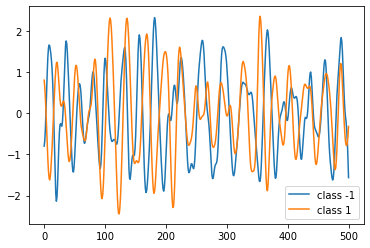

In [5]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()


In [6]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


In [7]:
num_classes = len(np.unique(y_train))

In [8]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]


In [9]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0


In [10]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [13]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=10, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 7s 10ms/step - loss: 0.6164 - sparse_categorical_accuracy: 0.6632 - val_loss: 0.7631 - val_sparse_categorical_accuracy: 0.4716
Epoch 2/500
90/90 [==============================] - 0s 6ms/step - loss: 0.4849 - sparse_categorical_accuracy: 0.7653 - val_loss: 0.7889 - val_sparse_categorical_accuracy: 0.4716
Epoch 3/500
90/90 [==============================] - 0s 5ms/step - loss: 0.4709 - sparse_categorical_accuracy: 0.7590 - val_loss: 0.8882 - val_sparse_categorical_accuracy: 0.4716
Epoch 4/500
90/90 [==============================] - 0s 6ms/step - loss: 0.4164 - sparse_categorical_accuracy: 0.7983 - val_loss: 0.6578 - val_sparse_categorical_accuracy: 0.5798
Epoch 5/500
90/90 [==============================] - 1s 6ms/step - loss: 0.4263 - sparse_categorical_accuracy: 0.7889 - val_loss: 0.5805 - val_sparse_categorical_accuracy: 0.6214
Epoch 6/500
90/90 [==============================] - 0s 5ms/step - loss: 0.4188 - sparse_categorical_acc

90/90 [==============================] - 0s 5ms/step - loss: 0.2467 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.3233 - val_sparse_categorical_accuracy: 0.8447
Epoch 47/500
90/90 [==============================] - 0s 5ms/step - loss: 0.2483 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.2530 - val_sparse_categorical_accuracy: 0.8904
Epoch 48/500
90/90 [==============================] - 1s 6ms/step - loss: 0.2357 - sparse_categorical_accuracy: 0.9052 - val_loss: 0.3326 - val_sparse_categorical_accuracy: 0.8544
Epoch 49/500
90/90 [==============================] - 1s 6ms/step - loss: 0.2366 - sparse_categorical_accuracy: 0.9031 - val_loss: 0.2397 - val_sparse_categorical_accuracy: 0.8960
Epoch 50/500
90/90 [==============================] - 0s 5ms/step - loss: 0.2524 - sparse_categorical_accuracy: 0.8972 - val_loss: 0.2454 - val_sparse_categorical_accuracy: 0.8904
Epoch 51/500
90/90 [==============================] - 1s 6ms/step - loss: 0.2367 - sparse_categorical_accuracy: 0

90/90 [==============================] - 0s 6ms/step - loss: 0.1136 - sparse_categorical_accuracy: 0.9622 - val_loss: 0.3048 - val_sparse_categorical_accuracy: 0.8696
Epoch 92/500
90/90 [==============================] - 0s 6ms/step - loss: 0.1136 - sparse_categorical_accuracy: 0.9611 - val_loss: 0.2455 - val_sparse_categorical_accuracy: 0.8890
Epoch 93/500
90/90 [==============================] - 0s 5ms/step - loss: 0.1154 - sparse_categorical_accuracy: 0.9590 - val_loss: 0.1418 - val_sparse_categorical_accuracy: 0.9487
Epoch 94/500
90/90 [==============================] - 0s 6ms/step - loss: 0.1095 - sparse_categorical_accuracy: 0.9628 - val_loss: 0.5292 - val_sparse_categorical_accuracy: 0.8114
Epoch 95/500
90/90 [==============================] - 0s 5ms/step - loss: 0.1069 - sparse_categorical_accuracy: 0.9632 - val_loss: 0.1375 - val_sparse_categorical_accuracy: 0.9570
Epoch 96/500
90/90 [==============================] - 0s 5ms/step - loss: 0.1314 - sparse_categorical_accuracy: 0

90/90 [==============================] - 0s 6ms/step - loss: 0.0767 - sparse_categorical_accuracy: 0.9747 - val_loss: 0.1073 - val_sparse_categorical_accuracy: 0.9639
Epoch 137/500
90/90 [==============================] - 0s 6ms/step - loss: 0.0773 - sparse_categorical_accuracy: 0.9760 - val_loss: 0.0927 - val_sparse_categorical_accuracy: 0.9653
Epoch 138/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0830 - sparse_categorical_accuracy: 0.9719 - val_loss: 0.1150 - val_sparse_categorical_accuracy: 0.9598
Epoch 139/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0784 - sparse_categorical_accuracy: 0.9760 - val_loss: 0.0881 - val_sparse_categorical_accuracy: 0.9750
Epoch 140/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9743 - val_loss: 0.1084 - val_sparse_categorical_accuracy: 0.9653
Epoch 141/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0800 - sparse_categorical_accura

90/90 [==============================] - 1s 6ms/step - loss: 0.0620 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.1277 - val_sparse_categorical_accuracy: 0.9528
Epoch 182/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0646 - sparse_categorical_accuracy: 0.9788 - val_loss: 0.1143 - val_sparse_categorical_accuracy: 0.9598
Epoch 183/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0610 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.0974 - val_sparse_categorical_accuracy: 0.9653
Epoch 184/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0612 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.0925 - val_sparse_categorical_accuracy: 0.9639
Epoch 185/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0624 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.1134 - val_sparse_categorical_accuracy: 0.9598
Epoch 186/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0618 - sparse_categorical_accura

90/90 [==============================] - 1s 6ms/step - loss: 0.0522 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.0845 - val_sparse_categorical_accuracy: 0.9709
Epoch 227/500
90/90 [==============================] - 1s 7ms/step - loss: 0.0532 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0844 - val_sparse_categorical_accuracy: 0.9723
Epoch 228/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0570 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.0852 - val_sparse_categorical_accuracy: 0.9709
Epoch 229/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0493 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0817 - val_sparse_categorical_accuracy: 0.9736
Epoch 230/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0531 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.0835 - val_sparse_categorical_accuracy: 0.9736
Epoch 231/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0529 - sparse_categorical_accura

90/90 [==============================] - 1s 6ms/step - loss: 0.0470 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0854 - val_sparse_categorical_accuracy: 0.9681
Epoch 272/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0505 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.0863 - val_sparse_categorical_accuracy: 0.9667
Epoch 273/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0481 - sparse_categorical_accuracy: 0.9872 - val_loss: 0.0807 - val_sparse_categorical_accuracy: 0.9778
Epoch 274/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0498 - sparse_categorical_accuracy: 0.9854 - val_loss: 0.0814 - val_sparse_categorical_accuracy: 0.9736
Epoch 275/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0481 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.0895 - val_sparse_categorical_accuracy: 0.9736
Epoch 276/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0532 - sparse_categorical_accura

90/90 [==============================] - 1s 6ms/step - loss: 0.0459 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0819 - val_sparse_categorical_accuracy: 0.9750
Epoch 317/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0439 - sparse_categorical_accuracy: 0.9872 - val_loss: 0.0807 - val_sparse_categorical_accuracy: 0.9681
Epoch 318/500
90/90 [==============================] - 0s 6ms/step - loss: 0.0421 - sparse_categorical_accuracy: 0.9875 - val_loss: 0.0799 - val_sparse_categorical_accuracy: 0.9695
Epoch 319/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0430 - sparse_categorical_accuracy: 0.9878 - val_loss: 0.0797 - val_sparse_categorical_accuracy: 0.9681
Epoch 320/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0473 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.0795 - val_sparse_categorical_accuracy: 0.9709
Epoch 321/500
90/90 [==============================] - 1s 6ms/step - loss: 0.0437 - sparse_categorical_accura

In [14]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)


42/42 [==============================] - 1s 9ms/step - loss: 0.0897 - sparse_categorical_accuracy: 0.9667
Test accuracy 0.9666666388511658
Test loss 0.08967401087284088


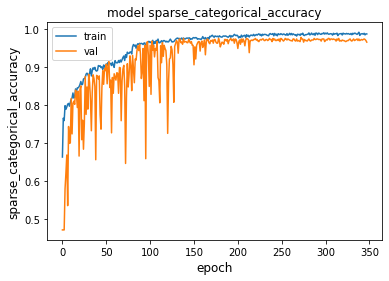

In [15]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

